In [ ]:
Question 1

In [ ]:
Step 1

In [1]:
import pandas as pd

In [ ]:
Step 2 & 3

In [2]:
users = pd.read_csv("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user", sep = "|")
users

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


In [ ]:
Step 4

In [3]:
users.groupby("occupation").age.mean()

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

In [ ]:
Step 5

In [4]:
occupation = users.groupby('occupation') ['gender'].value_counts().unstack().fillna(0)
occupation['male_ratio'] =  occupation['M'] /  (occupation['M'] + occupation['F'])

occupation_ratios = occupation.reset_index()[['occupation', 'male_ratio']]


sorted_ratios = occupation_ratios.sort_values(by='male_ratio', ascending=False)

sorted_ratios

gender,occupation,male_ratio
2,doctor,1.000000
4,engineer,0.970149
19,technician,0.962963
15,retired,0.928571
14,programmer,0.909091
6,executive,0.906250
17,scientist,0.903226
5,entertainment,0.888889
9,lawyer,0.833333
16,salesman,0.750000


In [ ]:
Step 6

In [5]:
occupation_status = users.groupby('occupation')['age'].agg([min, max])
occupation_status

,min,max
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


In [ ]:
Step 7

In [7]:
mean = users.groupby(['occupation', 'gender'])['age'].mean().reset_index()
mean

,occupation,gender,age
0,administrator,F,40.638889
1,administrator,M,37.162791
2,artist,F,30.307692
3,artist,M,32.333333
4,doctor,M,43.571429
5,educator,F,39.115385
6,educator,M,43.101449
7,engineer,F,29.500000
8,engineer,M,36.600000
9,entertainment,F,31.000000


In [ ]:
Step 8

In [8]:
gender_c = users.groupby(['occupation', 'gender']).size().unstack().fillna(0)
gender_c['total'] = gender_c['F'] + gender_c['M']

gender_c['percentage_women'] = (gender_c['F'] / gender_c['total']) * 100

gender_c['percentage_men'] = (gender_c['M'] / gender_c['total']) * 100
gender_percent = gender_c.reset_index()[['occupation', 'percentage_women', 'percentage_men']]
gender_percent

gender,occupation,percentage_women,percentage_men
0,administrator,45.569620,54.430380
1,artist,46.428571,53.571429
2,doctor,0.000000,100.000000
3,educator,27.368421,72.631579
4,engineer,2.985075,97.014925
5,entertainment,11.111111,88.888889
6,executive,9.375000,90.625000
7,healthcare,68.750000,31.250000
8,homemaker,85.714286,14.285714
9,lawyer,16.666667,83.333333


In [ ]:
Question 2

In [ ]:
Step 1 & 2 & 3

In [9]:
euro12 = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv', sep=',')
euro12

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17


In [ ]:
Step 4

In [10]:
euro12.Goals

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

In [ ]:
Step 5

In [11]:
no_of_teams = euro12['Team'].nunique()
no_of_teams

16

In [ ]:
Step 6

In [12]:
no_of_columns = euro12.shape[1]
no_of_columns

35

In [ ]:
Step 7

In [13]:
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


In [ ]:
Step 8

In [14]:
discipline.sort_values(by=['Red Cards', 'Yellow Cards'], ascending=False)


,Team,Yellow Cards,Red Cards
6,Greece,9,1
9,Poland,7,1
11,Republic of Ireland,6,1
7,Italy,16,0
10,Portugal,12,0
13,Spain,11,0
0,Croatia,9,0
1,Czech Republic,7,0
14,Sweden,7,0
4,France,6,0


In [ ]:
Step 9

In [15]:
yellow_cards_mean = euro12['Yellow Cards'].mean()
yellow_cards_mean

7.4375

In [ ]:
Step 10

In [16]:
euro12[euro12['Goals'] > 6]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


In [ ]:
Step 11

In [17]:
euro12[euro12.Team.str.startswith('G')]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


In [ ]:
Step 12

In [18]:
euro12.iloc[:, :7]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


In [ ]:
Step 13

In [19]:
euro12.iloc[:, :-3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


In [ ]:
Step 14

In [20]:
euro12.loc[euro12.Team.isin(['England', 'Italy', 'Russia']), ['Team','Shooting Accuracy']]

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


In [ ]:
Question 3

In [ ]:
Step 1 & 2

In [22]:
import pandas as pd

In [23]:
import numpy as np

In [24]:
s_1 = pd.Series(np.random.randint(1, 5, size=100))

In [25]:
s_2 = pd.Series(np.random.randint(1, 4, size=100))

In [26]:
s_3 = pd.Series(np.random.randint(10000, 30001, size=100))

In [27]:
print(s_1, s_2, s_3)

0     4
1     2
2     1
3     1
4     1
     ..
95    3
96    3
97    3
98    2
99    2
Length: 100, dtype: int64 0     2
1     2
2     2
3     2
4     1
     ..
95    3
96    3
97    3
98    3
99    3
Length: 100, dtype: int64 0     16869
1     26394
2     14093
3     22890
4     13443
      ...  
95    22535
96    10884
97    26685
98    25041
99    15005
Length: 100, dtype: int64


In [ ]:
step 3 & 4

In [28]:
data_frame = pd.concat([s_1, s_2, s_3], axis=1)
data_frame.columns = ['bedrs', 'bathrs', 'price_sqr_meter']
data_frame

,bedrs,bathrs,price_sqr_meter
0,4,2,16869
1,2,2,26394
2,1,2,14093
3,1,2,22890
4,1,1,13443
...,...,...,...
95,3,3,22535
96,3,3,10884
97,3,3,26685
98,2,3,25041


In [ ]:
Step 5

In [29]:
bigcolumn = pd.DataFrame(pd.concat([s_1, s_2, s_3]))
bigcolumn

,0
0,4
1,2
2,1
3,1
4,1
...,...
95,22535
96,10884
97,26685
98,25041


In [ ]:
Step 6

In [ ]:
Ops it seems it is going only until index 99. Is it true?  Yes

In [ ]:
Step 7

In [30]:
bigcolumn.reset_index(drop=True, inplace=True)
bigcolumn

,0
0,4
1,2
2,1
3,1
4,1
...,...
295,22535
296,10884
297,26685
298,25041


In [ ]:
Question 4

In [ ]:
Step 1 & 2 & 3

In [31]:
import pandas as pd
import numpy as np


file_path = "/Users/yaazhinimurugavel/Downloads/wind.txt"
data = pd.read_table(file_path, sep='\s+', parse_dates=[[0, 1, 2]])
data

/var/folders/n4/pd0tgvhn10db5zyyyl3lfgsr0000gn/T/ipykernel_32484/1912464824.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_table(file_path, sep='\s+', parse_dates=[[0, 1, 2]])


,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,1978-12-30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


In [ ]:
Step 4

In [32]:
def fix_year(date):
    if date.year > 1989:
        date = date.replace(year=date.year - 100)
    return date


data['Date'] = data['Yr_Mo_Dy'].apply(fix_year)


data.set_index('Date', inplace=True)
data.drop(['Yr_Mo_Dy'], axis=1, inplace=True)

data

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58


In [ ]:
Step 5

In [33]:
data.index.name = 'Date'

In [34]:
data

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58


In [ ]:
Step 6

In [35]:
data.isnull().sum()

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

In [ ]:
Step 7

In [36]:
data.notnull().sum().sum()

78857

In [ ]:
Step 8

In [37]:
 data.stack().mean()

10.22788376428218

In [ ]:
A single number for the entire dataset.
Step 9.

In [38]:
loc_stats = pd.DataFrame({
    'Min': data.min(),'Max': data.max(),
    'Mean': data.mean(),'Std': data.std()})
loc_stats

,Min,Max,Mean,Std
RPT,0.67,35.80,12.362987,5.618413
VAL,0.21,33.37,10.644314,5.267356
ROS,1.50,33.84,11.660526,5.008450
KIL,0.00,28.46,6.306468,3.605811
SHA,0.13,37.54,10.455834,4.936125
BIR,0.00,26.16,7.092254,3.968683
DUB,0.00,30.37,9.797343,4.977555
CLA,0.00,31.08,8.495053,4.499449
MUL,0.00,25.88,8.493590,4.166872
CLO,0.04,28.21,8.707332,4.503954


In [ ]:
A different set of numbers for each location.
Step 10

In [39]:
day_stats = pd.DataFrame({
    'Min': data.min(axis=1),'Max': data.max(axis=1),
    'Mean': data.mean(axis=1),'Std': data.std(axis=1)})
day_stats

,Min,Max,Mean,Std
Date,,,,
1961-01-01,9.29,18.50,13.018182,2.808875
1961-01-02,6.50,17.54,11.336364,3.188994
1961-01-03,6.17,18.50,11.641818,3.681912
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356
...,...,...,...,...
1978-12-27,8.08,40.08,16.708333,7.868076
1978-12-28,5.00,41.46,15.150000,9.687857
1978-12-29,8.71,29.58,14.890000,5.756836


In [ ]:
A different set of numbers for each day.
Step 11

In [40]:
data[data.index.month == 1].mean()

RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64

In [ ]:
Step from 12 untill 15

In [41]:
# Step 11
january_avg = data[data.index.month == 1].groupby(data[data.index.month == 1].index.year).mean()
january_avg


,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961,14.841333,11.988333,13.431613,7.736774,11.072759,8.588065,11.184839,9.245333,9.085806,10.107419,13.880968,14.703226
1962,14.783871,13.160323,12.591935,7.538065,11.779677,8.720000,14.211935,9.600000,9.670000,11.498710,16.369355,15.661613
1963,14.868387,11.112903,15.121613,6.635806,11.080645,7.835484,12.797419,9.844839,7.841613,9.390000,11.428710,18.822258
1964,12.661290,11.818387,11.741290,6.953548,11.400645,6.865806,9.592903,9.687419,6.947742,9.676774,15.067419,14.145484
1965,15.741613,15.546774,15.274194,8.258387,13.588065,9.251290,13.850968,11.260000,9.899355,11.706129,16.196129,17.888710
1966,15.834839,13.283226,15.136452,8.659355,12.968065,9.163548,12.150000,10.475806,8.750645,10.739677,14.074516,15.554194
1967,13.736129,11.470968,11.537419,6.928065,10.833548,6.730323,9.787419,7.474839,7.627097,10.169032,13.457742,17.124516
1968,14.733226,12.829032,12.294194,7.849032,12.262581,7.133226,12.395806,9.225806,9.415484,9.255161,14.213871,19.095484
1969,12.824839,12.113871,11.403871,6.708710,10.557097,5.926452,9.882903,8.375161,8.378065,9.515484,13.410000,16.957742


In [42]:
# Step 12
yearly_avg = data.resample('Y').mean()
yearly_avg


,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-12-31,12.299583,10.351796,11.362369,6.958227,10.881763,7.729726,9.733923,8.858788,8.647652,9.835577,13.502795,13.680773
1962-12-31,12.246923,10.110438,11.732712,6.960440,10.657918,7.393068,11.020712,8.793753,8.316822,9.676247,12.930685,14.323956
1963-12-31,12.813452,10.836986,12.541151,7.330055,11.724110,8.434712,11.075699,10.336548,8.903589,10.224438,13.638877,14.999014
1964-12-31,12.363661,10.920164,12.104372,6.787787,11.454481,7.570874,10.259153,9.467350,7.789016,10.207951,13.740546,14.910301
1965-12-31,12.451370,11.075534,11.848767,6.858466,11.024795,7.478110,10.618712,8.879918,7.907425,9.918082,12.964247,15.591644
1966-12-31,13.461973,11.557205,12.020630,7.345726,11.805041,7.793671,10.579808,8.835096,8.514438,9.768959,14.265836,16.307260
1967-12-31,12.737151,10.990986,11.739397,7.143425,11.630740,7.368164,10.652027,9.325616,8.645014,9.547425,14.774548,17.135945
1968-12-31,11.835628,10.468197,11.409754,6.477678,10.760765,6.067322,8.859180,8.255519,7.224945,7.832978,12.808634,15.017486
1969-12-31,11.166356,9.723699,10.902000,5.767973,9.873918,6.189973,8.564493,7.711397,7.924521,7.754384,12.621233,15.762904


In [43]:
# Step 13
monthly_avg = data.resample('M').mean()
monthly_avg

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01-31,14.841333,11.988333,13.431613,7.736774,11.072759,8.588065,11.184839,9.245333,9.085806,10.107419,13.880968,14.703226
1961-02-28,16.269286,14.975357,14.441481,9.230741,13.852143,10.937500,11.890714,11.846071,11.821429,12.714286,18.583214,15.411786
1961-03-31,10.890000,11.296452,10.752903,7.284000,10.509355,8.866774,9.644194,9.829677,10.294138,11.251935,16.410968,15.720000
1961-04-30,10.722667,9.427667,9.998000,5.830667,8.435000,6.495000,6.925333,7.094667,7.342333,7.237000,11.147333,10.278333
1961-05-31,9.860968,8.850000,10.818065,5.905333,9.490323,6.574839,7.604000,8.177097,8.039355,8.499355,11.900323,12.011613
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-08-31,9.645161,8.259355,9.032258,4.502903,7.368065,5.935161,5.650323,5.417742,7.241290,5.536774,10.466774,12.054194
1978-09-30,10.913667,10.895000,10.635000,5.725000,10.372000,9.278333,10.790333,9.583000,10.069333,8.939000,15.680333,19.391333
1978-10-31,9.897742,8.670968,9.295806,4.721290,8.525161,6.774194,8.115484,7.337742,8.297742,8.243871,13.776774,17.150000


In [44]:
# Step 14
weekly_avg = data.resample('W').mean()
weekly_avg

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01-01,15.040000,14.960000,13.170000,9.290000,NaN,9.870000,13.670000,10.250000,10.830000,12.580000,18.500000,15.040000
1961-01-08,13.541429,11.486667,10.487143,6.417143,9.474286,6.435714,11.061429,6.616667,8.434286,8.497143,12.481429,13.238571
1961-01-15,12.468571,8.967143,11.958571,4.630000,7.351429,5.072857,7.535714,6.820000,5.712857,7.571429,11.125714,11.024286
1961-01-22,13.204286,9.862857,12.982857,6.328571,8.966667,7.417143,9.257143,7.875714,7.145714,8.124286,9.821429,11.434286
1961-01-29,19.880000,16.141429,18.225714,12.720000,17.432857,14.828571,15.528571,15.160000,14.480000,15.640000,20.930000,22.530000
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-03,14.934286,11.232857,13.941429,5.565714,10.215714,8.618571,9.642857,7.685714,9.011429,9.547143,11.835714,18.728571
1978-12-10,20.740000,19.190000,17.034286,9.777143,15.287143,12.774286,14.437143,12.488571,13.870000,14.082857,18.517143,23.061429
1978-12-17,16.758571,14.692857,14.987143,6.917143,11.397143,7.272857,10.208571,7.967143,9.168571,8.565714,11.102857,15.562857


In [45]:
# Step 15
location_stats = data.describe().transpose()[['min', 'max', 'mean', 'std']]
location_stats

,min,max,mean,std
RPT,0.67,35.80,12.362987,5.618413
VAL,0.21,33.37,10.644314,5.267356
ROS,1.50,33.84,11.660526,5.008450
KIL,0.00,28.46,6.306468,3.605811
SHA,0.13,37.54,10.455834,4.936125
BIR,0.00,26.16,7.092254,3.968683
DUB,0.00,30.37,9.797343,4.977555
CLA,0.00,31.08,8.495053,4.499449
MUL,0.00,25.88,8.493590,4.166872
CLO,0.04,28.21,8.707332,4.503954


In [ ]:
Question 5

In [ ]:
Step 1 - 4

In [46]:
import pandas as pd


url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'

chipo = pd.read_csv(url, sep='\t')
chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


In [ ]:
Step 5

In [47]:
len(chipo)

4622

In [ ]:
Step 6

In [48]:
chipo.shape[1]

5

In [ ]:
step 7

In [49]:
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [ ]:
Step 8

In [50]:
chipo.index

RangeIndex(start=0, stop=4622, step=1)

In [ ]:
Step 9

In [51]:
item=chipo['item_name'].value_counts().idxmax()
item

'Chicken Bowl'

In [ ]:
Step 10

In [52]:
 chipo[chipo['item_name'] == most_ordered_item]['quantity'].sum()

761

In [ ]:
Step 11

In [53]:
chipo['choice_description'].value_counts().idxmax()

'[Diet Coke]'

In [ ]:
step 12

In [54]:
chipo['quantity'].sum()

4972

In [ ]:
step 13

In [55]:
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))

chipo['item_price'].dtype

dtype('float64')

In [ ]:
step 14

In [58]:
sales=(chipo['quantity'] * chipo['item_price']).sum()
sales

39237.02

In [ ]:
step 15

In [61]:
no_of_orders=chipo['order_id'].nunique()
no_of_orders

1834

In [ ]:
Step 16

In [62]:
sales / no_of_orders

21.39423118865867

In [ ]:
Step 17

In [63]:
chipo['item_name'].nunique()

50

In [ ]:
Question 6

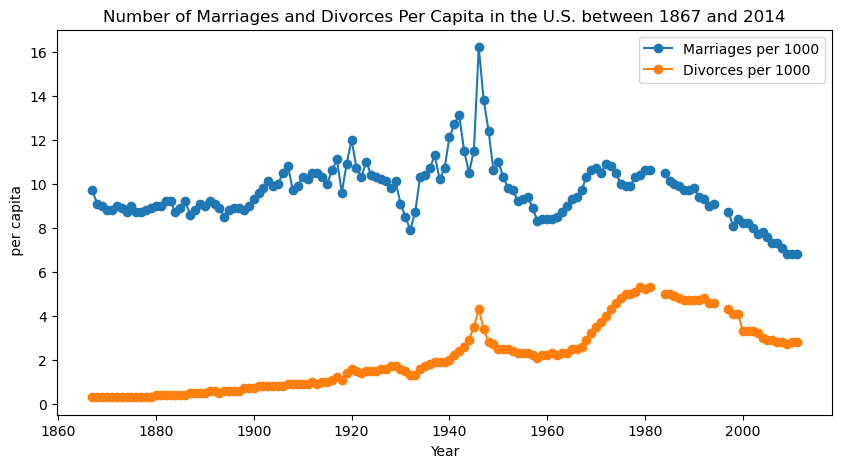

In [74]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = '/Users/yaazhinimurugavel/Downloads/us-marriages-divorces-1867-2014.csv'
data = pd.read_csv(file_path)


plt.figure(figsize=(10, 5))

plt.plot(data['Year'], data['Marriages_per_1000'], label='Marriages per 1000', marker='o')
plt.plot(data['Year'], data['Divorces_per_1000'], label='Divorces per 1000', marker='o')


plt.title('Number of Marriages and Divorces Per Capita in the U.S. between 1867 and 2014')
plt.xlabel('Year')

plt.ylabel(' per capita')
plt.legend()

plt.show()


In [ ]:
Question 7

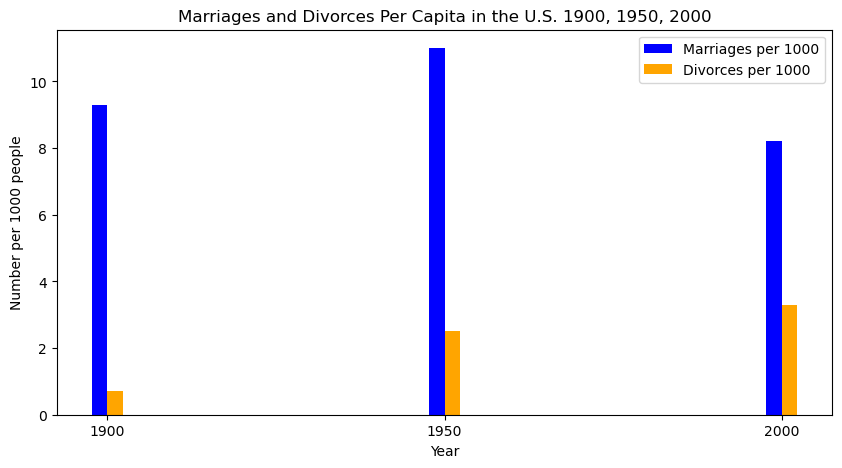

In [75]:

selected_years = [1900, 1950, 2000]
filtered_data = data[data['Year'].isin(selected_years)]


plt.figure(figsize=(10, 5))

bar_width = 2.25
bar_positions_marriages = filtered_data['Year'] - bar_width / 2
bar_positions_divorces = filtered_data['Year'] + bar_width / 2

plt.bar(bar_positions_marriages, filtered_data['Marriages_per_1000'], width=bar_width, label='Marriages per 1000', color='blue')
plt.bar(bar_positions_divorces, filtered_data['Divorces_per_1000'], width=bar_width, label='Divorces per 1000', color='orange')


plt.title('Marriages and Divorces Per Capita in the U.S. 1900, 1950, 2000')
plt.xlabel('Year')

plt.ylabel('Number per 1000 people')
plt.xticks(filtered_data['Year'], selected_years)
plt.legend()

plt.show()


In [ ]:
Question 8

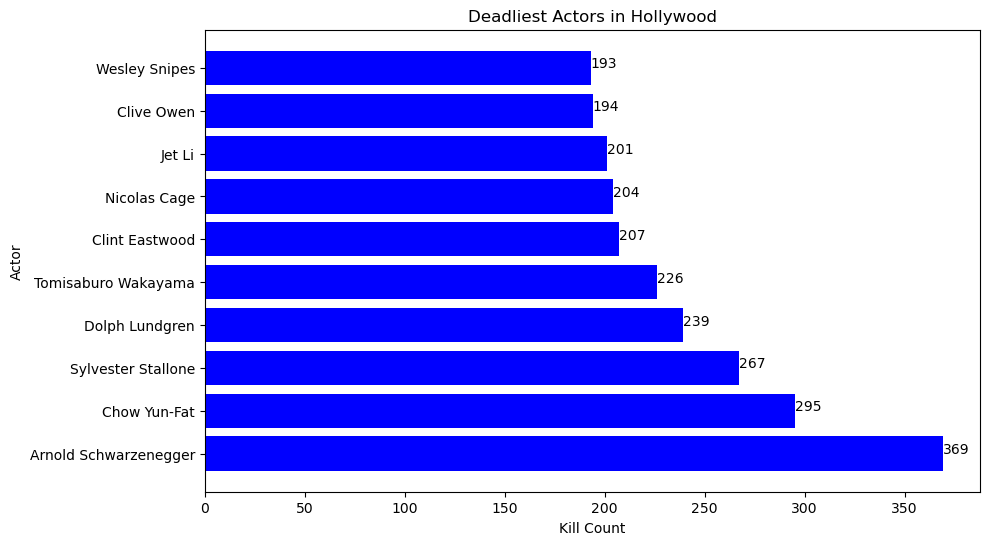

In [77]:
import pandas as pd
import matplotlib.pyplot as plt


file_path = '/Users/yaazhinimurugavel/Downloads/actor_kill_counts.csv'
data = pd.read_csv(file_path)


sorted_data = data.sort_values(by='Count', ascending=False)


plt.figure(figsize=(10, 5))
plt.barh(sorted_data['Actor'], sorted_data['Count'], color='blue')


plt.title('Deadliest Actors in Hollywood')
plt.xlabel('Kill Count')
plt.ylabel('Actor')


for index, value in enumerate(sorted_data['Count']):
    plt.text(value, index, str(value))

plt.show()


In [ ]:
Question 9

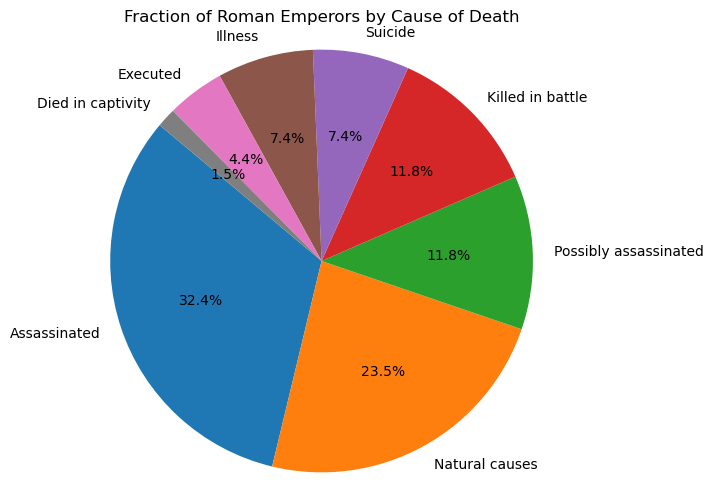

In [79]:
import pandas as pd
import matplotlib.pyplot as plt


file_path = '/Users/yaazhinimurugavel/Downloads/roman-emperor-reigns.csv'
data = pd.read_csv(file_path)


death_counts = data['Cause_of_Death'].value_counts()


plt.figure(figsize=(6, 6))
plt.pie(death_counts, labels=death_counts.index, autopct='%1.1f%%', startangle=140)


plt.title('Fraction of Roman Emperors by Cause of Death')
plt.axis('equal')  


plt.show()

In [ ]:
Question 10

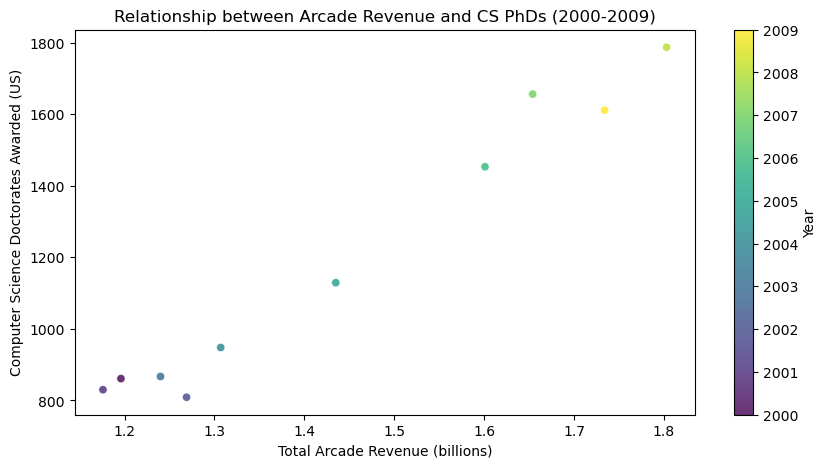

In [82]:
import pandas as pd
import matplotlib.pyplot as plt


file_path = '/Users/yaazhinimurugavel/Downloads/arcade-revenue-vs-cs-doctorates.csv'
data = pd.read_csv(file_path)


plt.figure(figsize=(10, 5))
scatter = plt.scatter(data['Total Arcade Revenue (billions)'], data['Computer Science Doctorates Awarded (US)'],
                      c=data['Year'], cmap='viridis', alpha=0.8, edgecolors='w', linewidths=0.5)


plt.title('Relationship between Arcade Revenue and CS PhDs (2000-2009)')
plt.xlabel('Total Arcade Revenue (billions)')

plt.ylabel('Computer Science Doctorates Awarded (US)')


colorbar = plt.colorbar(scatter)

colorbar.set_label('Year')


plt.show()